In [1]:
import os
ABN =-176.45570973 
ZINC100 =  -22154.73868250
ABN_ZINC = ABN + ZINC100

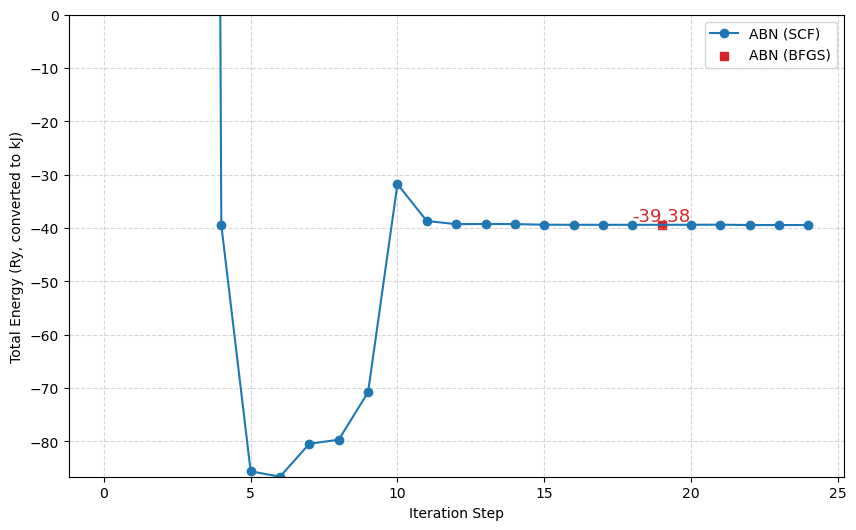

In [2]:
import os
import pandas as pd 
import matplotlib.pyplot as plt 

# CSV 파일 선택
csv_files = [x for x in os.listdir() if ".csv" in x]
csv_file = csv_files[0]
df = pd.read_csv(csv_file)

# 변환: 에너지 단위 변환 (ABN_ZINC는 미리 정의되어 있어야 함)
ad_energy_kj = (df["energy"] - ABN_ZINC) * 2625.49884478051

# 변환된 에너지 값을 DataFrame에 저장
df["ad_energy_kj"] = ad_energy_kj

# "step_type" 열에 따라 분리 (예: "BFGS_step"이면 BFGS, 그렇지 않으면 SCF)
df_bfgs = df[df["step_type"] == "BFGS_step"]
df_scf = df[df["step_type"] != "BFGS_step"]

plt.figure(figsize=(10, 6))
plt.ylim(min(ad_energy_kj), 0)

# SCF 단계: 파란색 선과 마커
plt.plot(df_scf.index, df_scf["ad_energy_kj"], marker='o', linestyle='-', color='tab:blue', label="ABN (SCF)")

# BFGS 단계: 빨간색 scatter
plt.scatter(df_bfgs.index, df_bfgs["ad_energy_kj"], marker='s', color='tab:red', label="ABN (BFGS)")

# BFGS 데이터 포인트에 에너지 값을 텍스트로 표시
for idx, row in df_bfgs.iterrows():
    plt.text(idx, row["ad_energy_kj"], f'{row["ad_energy_kj"]:.2f}', 
             fontsize=13, color='tab:red', ha='center', va='bottom')

plt.xlabel("Iteration Step")
plt.ylabel("Total Energy (Ry, converted to kJ)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


In [3]:
ad_energy_kj[-1] , ad_energy_ev[-1]

(-347721.8882325156, -3603.876337517181)